In [1]:
# Loading our data
import pandas as pd
df = pd.read_csv("ecommerce_data.csv", encoding = 'ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
# View a summary of our data
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n", df.nunique())

Rows     :  541909
Columns  :  8

Features : 
 ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Missing values :   136534

Unique values :  
 InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


In [3]:
# Statistics on our numeric columns
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
# Removing cancelled orders (shown as negative values in Quantity)
df = df.loc[df['Quantity'] > 0]
df = df.loc[df['UnitPrice'] > 0]


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [6]:
# Check for null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [7]:
# Looking records with missing customer ID 
df.loc[df['CustomerID'].isna()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom


In [8]:
# Number of records and shape before dropping our missing values
df.shape

(530104, 8)

In [9]:
# Let's drop these records since we can't build our required matrixes 
df = df.dropna(subset=['CustomerID'])

In [10]:
# Number of records after dropping our missing values
df.shape

(397884, 8)

In [11]:
# Check for null values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
print ("\nUnique values :  \n", df.nunique())


Unique values :  
 InvoiceNo      18532
StockCode       3665
Description     3877
Quantity         301
InvoiceDate    17282
UnitPrice        440
CustomerID      4338
Country           37
dtype: int64


##                                 Building a Customer-Item Matrix

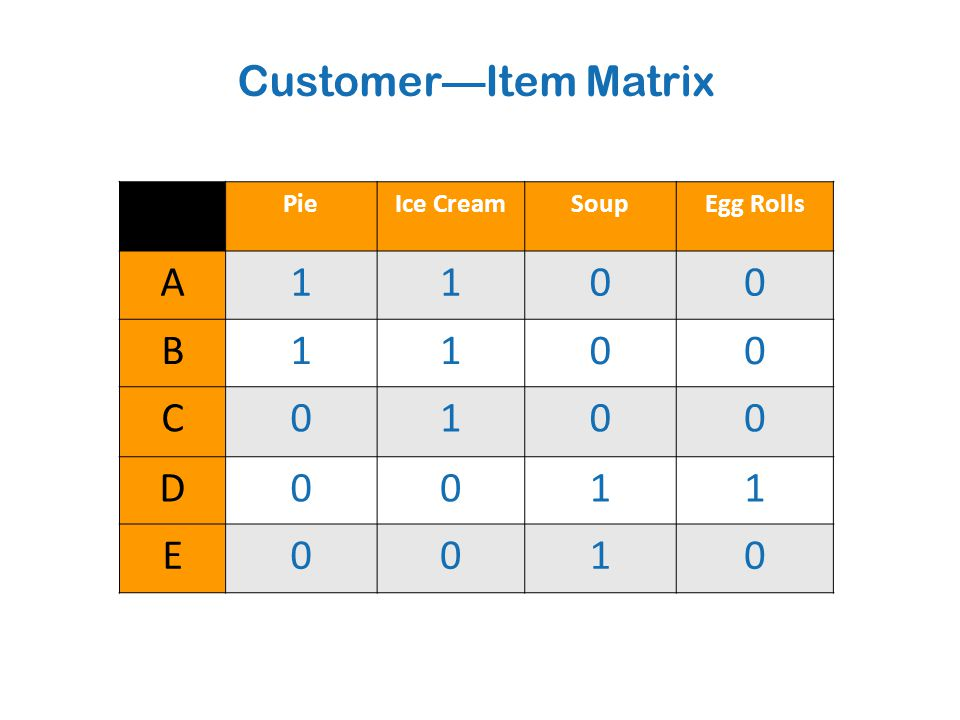

In [13]:
#import a pic for the project
from IPython.display import Image
Image("img.jpg")

In [14]:
# We need a create a matrix that contains the customer IDs as the index, and each invidividual item as a column
# We use the pivot function to use the CustomerID as the index and use the StockCode as columns
# Then we using the Quantity value as the values we display, and finally use the aggfunc to sum up these values
customer_item_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity',aggfunc='sum')
customer_item_matrix.tail()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
18280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18283.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
18287.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# We have quanties, but we don't actually need the exact numbers
# Let's now change all the NaNs to 0 and all values above 1 to 1
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)
customer_item_matrix.tail()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18283.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18287.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
customer_item_matrix.shape

(4338, 3665)

## Creating Colaborative Filter

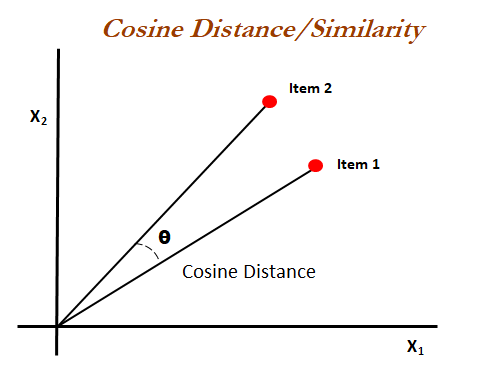

In [17]:
from IPython.display import Image
Image("img2.png")

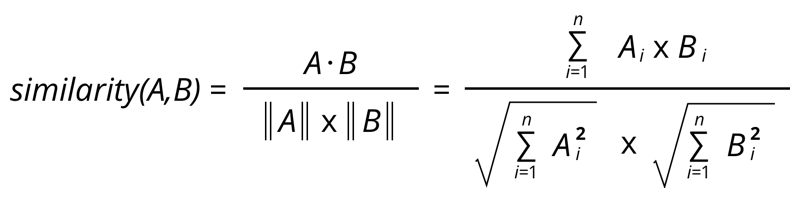

In [18]:
from IPython.display import Image
Image("img3.png")

In [19]:
# import our cosine_similarity function from sklearn
from sklearn.metrics.pairwise import cosine_similarity

In [20]:
# Let's use the sklearn cosine_similarity function to compute the pairwise cosine similarities between the cusomters 

user_user_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix))
user_user_sim_matrix

,0,1,2,3,4,5,6,7,8,9,...,4328,4329,4330,4331,4332,4333,4334,4335,4336,4337
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.000000,0.032844,0.062318,0.000000,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.000000,0.000000,0.000000,0.000000,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044866,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,0.0,0.062318,0.000000,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.105409,1.000000,0.119523,0.000000,0.000000,0.000000
4334,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.119523,1.000000,0.000000,0.046613,0.000000
4335,0.0,0.113776,0.000000,0.067574,0.000000,0.037582,0.0,0.000000,0.160128,0.079305,...,0.0,0.174078,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.017800,0.000000
4336,0.0,0.109364,0.170905,0.137124,0.044866,0.080278,0.0,0.113354,0.034204,0.093170,...,0.0,0.037184,0.016480,0.043602,0.000000,0.000000,0.046613,0.017800,1.000000,0.096334


In [21]:
# Also let's check out the shape, it should be a square matrix (i.e. same width and length)
user_user_sim_matrix.shape

(4338, 4338)

In [22]:
# Let's now re-label the columns so that it's easier to understand
# Now let's change the index from 0 to 4339 to the Customer IDs 

user_user_sim_matrix.columns = customer_item_matrix.index

user_user_sim_matrix['CustomerID'] = customer_item_matrix.index

user_user_sim_matrix = user_user_sim_matrix.set_index('CustomerID')
user_user_sim_matrix.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


### Customer most similar to our test customer,'12358'

In [23]:
# Sort on the customers most similar to 12358
user_user_sim_matrix.loc[12358].sort_values(ascending=False)

CustomerID
12358.0    1.000000
14145.0    0.452911
14155.0    0.452911
18240.0    0.452911
13551.0    0.416025
             ...   
16099.0    0.000000
16098.0    0.000000
16097.0    0.000000
16096.0    0.000000
12346.0    0.000000
Name: 12358.0, Length: 4338, dtype: float64

### What Item did 12358 buy?


In [24]:
# We use the `nonzero` function in the pandas package as it returns the integer indexes of the elements of the non-zero columns (hence the items bought).
# We convert to set data type so that we can perform comparison operations easily afterward.
# See what items were purchased by our customer '12358.0'
items_bought_by_12358 = set(customer_item_matrix.loc[12358].iloc[customer_item_matrix.loc[12358].to_numpy().nonzero()].index)
items_bought_by_12358

{'15056BL',
 '15056N',
 '15056P',
 '15060B',
 '20679',
 '21232',
 '22059',
 '22063',
 '22646',
 '37447',
 '37449',
 '48185',
 'POST'}

In [25]:
# Let's see what customer 14145.0 bought
items_bought_by_14145 = set(customer_item_matrix.loc[14145.0].iloc[customer_item_matrix.loc[14145.0].to_numpy().nonzero()].index)
items_bought_by_14145

{'15056BL', '15056N', '15056P', '20679', '85014A', '85014B'}

In [26]:
# What items did 12358 buy, but 14145 didn't buy?
# Those would be good items to recommend to 14145 since they're so similar
items_to_recommend_to_14145 = items_bought_by_12358 - items_bought_by_14145
items_to_recommend_to_14145

{'15060B',
 '21232',
 '22059',
 '22063',
 '22646',
 '37447',
 '37449',
 '48185',
 'POST'}

In [27]:
# Let's get the descriptions of these items 
df.loc[df['StockCode'].isin(items_to_recommend_to_14145), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode')

,Description
StockCode,
POST,POSTAGE
22646,CERAMIC STRAWBERRY CAKE MONEY BANK
48185,DOORMAT FAIRY CAKE
21232,STRAWBERRY CERAMIC TRINKET BOX
22059,CERAMIC STRAWBERRY DESIGN MUG
37449,CERAMIC CAKE STAND + HANGING CAKES
15060B,FAIRY CAKE DESIGN UMBRELLA
37447,CERAMIC CAKE DESIGN SPOTTED PLATE
22063,CERAMIC BOWL WITH STRAWBERRY DESIGN


### Finding item to recommend to a customer

In [28]:
most_similar_user = user_user_sim_matrix.loc[12358].sort_values(ascending=False).reset_index().iloc[1, 0]
most_similar_user

14145.0

In [29]:
def get_items_to_recommend_cust(cust_a):
  '''returns the items to recommend to a customer using customer similarity'''
  most_similar_user = user_user_sim_matrix.loc[cust_a].sort_values(ascending=False).reset_index().iloc[1, 0]
  items_bought_by_cust_a = set(customer_item_matrix.loc[cust_a].iloc[customer_item_matrix.loc[cust_a].to_numpy().nonzero()].index)
  items_bought_by_cust_b = set(customer_item_matrix.loc[most_similar_user].iloc[customer_item_matrix.loc[most_similar_user].to_numpy().nonzero()].index)
  items_to_recommend_to_a = items_bought_by_cust_b - items_bought_by_cust_a
  items_description = df.loc[df['StockCode'].isin(items_to_recommend_to_a), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode')
  return items_description

In [30]:
get_items_to_recommend_cust(12358.0)

,Description
StockCode,
85014B,RED RETROSPOT UMBRELLA
85014A,BLACK/BLUE POLKADOT UMBRELLA


In [31]:
get_items_to_recommend_cust(12348.0)

,Description
StockCode,
21212,PACK OF 72 RETROSPOT CAKE CASES
21975,PACK OF 60 DINOSAUR CAKE CASES


In [32]:
get_items_to_recommend_cust(12350.0)

,Description
StockCode,
22752,SET 7 BABUSHKA NESTING BOXES
22749,FELTCRAFT PRINCESS CHARLOTTE DOLL
22659,LUNCH BOX I LOVE LONDON
85099B,JUMBO BAG RED RETROSPOT
22449,SILK PURSE BABUSHKA PINK
22553,PLASTERS IN TIN SKULLS
21867,PINK UNION JACK LUGGAGE TAG
22754,SMALL RED BABUSHKA NOTEBOOK
22755,SMALL PURPLE BABUSHKA NOTEBOOK


### Item based Collaborative Filtering

In [33]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [34]:
# Transposing our customer_item_matrix
item_item_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix.T))
item_item_sim_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,3655,3656,3657,3658,3659,3660,3661,3662,3663,3664
0,1.000000,0.0,0.094868,0.091287,0.0,0.000000,0.090351,0.062932,0.098907,0.095346,...,0.0,0.0,0.0,0.0,0.0,0.029361,0.0,0.067591,0.0,0.078217
1,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.032774,0.045655,0.047836,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.016345,0.0,0.000000
2,0.094868,0.0,1.000000,0.115470,0.0,0.000000,0.057143,0.059702,0.041703,0.060302,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.071247,0.0,0.010993
3,0.091287,0.0,0.115470,1.000000,0.0,0.000000,0.164957,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,0.000000,0.0,0.000000,0.000000,1.0,0.447214,0.063888,0.044499,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [35]:
item_item_sim_matrix.shape

(3665, 3665)

In [36]:
# Let's now re-label the columns so that it's easier to understand
# Now let's change the index from 0 to 3665  to the StockCode 
item_item_sim_matrix.columns = customer_item_matrix.T.index

item_item_sim_matrix['StockCode'] = customer_item_matrix.T.index
item_item_sim_matrix = item_item_sim_matrix.set_index('StockCode')
item_item_sim_matrix.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.0,0.094868,0.091287,0.0,0.000000,0.090351,0.062932,0.098907,0.095346,...,0.0,0.0,0.0,0.0,0.0,0.029361,0.0,0.067591,0.0,0.078217
10080,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.032774,0.045655,0.047836,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.016345,0.0,0.000000
10120,0.094868,0.0,1.000000,0.115470,0.0,0.000000,0.057143,0.059702,0.041703,0.060302,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.071247,0.0,0.010993
10123C,0.091287,0.0,0.115470,1.000000,0.0,0.000000,0.164957,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
10124A,0.000000,0.0,0.000000,0.000000,1.0,0.447214,0.063888,0.044499,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [37]:
# Most similar items to 10080
item_item_sim_matrix.loc['10080'].sort_values(ascending=False)

StockCode
10080     1.000000
23694     0.191346
22039     0.187317
47504H    0.166924
21650     0.165567
            ...   
35909B    0.000000
35909A    0.000000
35833P    0.000000
35819P    0.000000
10002     0.000000
Name: 10080, Length: 3665, dtype: float64

In [38]:
# Get the top 10 most similar items
top_10_similar_items = list(item_item_sim_matrix.loc['10080'].sort_values(ascending=False).iloc[:10].index)
top_10_similar_items

['10080',
 '23694',
 '22039',
 '47504H',
 '21650',
 '90214F',
 '79157B',
 '90206A',
 '84012',
 '22043']

In [39]:
# Now let's make a function that returns the most similar items for an inputted item
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [40]:
# Get the row information fo a specific item
# Note it occurs multple times, but we need juw the basic info
df.loc[df['StockCode'] == '90210A']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
28848,538661,90210A,GREY ACRYLIC FACETED BANGLE,12,12/13/2010 15:42,1.25,15194.0,United Kingdom
28887,538662,90210A,GREY ACRYLIC FACETED BANGLE,12,12/13/2010 15:44,1.25,15159.0,United Kingdom
56707,541110,90210A,GREY ACRYLIC FACETED BANGLE,2,1/13/2011 15:11,2.95,15916.0,United Kingdom


In [41]:
df.loc[df['StockCode'] == '90210A'][:1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
28848,538661,90210A,GREY ACRYLIC FACETED BANGLE,12,12/13/2010 15:42,1.25,15194.0,United Kingdom


In [42]:
# This code checks our df for stock codes similar to those in our top_10_similar_items, we then display only the Stockcode and Description, remove duplicates
# and ten set the index to StockCode
df.loc[df['StockCode'].isin(top_10_similar_items), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode').loc[top_10_similar_items]

,Description
StockCode,
10080,GROOVY CACTUS INFLATABLE
23694,PAISLEY PARK CARD
22039,BOTANICAL LILY GIFT WRAP
47504H,ENGLISH ROSE SPIRIT LEVEL
21650,ASSORTED TUTTI FRUTTI BRACELET
90214F,"LETTER ""F"" BLING KEY RING"
79157B,UBO-LIGHT TRIOBASE BLUE
90206A,GOLD DIAMANTE STAR BROOCH
84012,MAGIC SHEEP WOOL GROWING FROM PAPER


In [43]:
def get_top_similar_items(item):
  top_10_similar_items = list(item_item_sim_matrix.loc[item].sort_values(ascending=False).iloc[:10].index)
  top_10 = df.loc[df['StockCode'].isin(top_10_similar_items), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode').loc[top_10_similar_items]
  return top_10

In [44]:
get_top_similar_items('84029E')

,Description
StockCode,
84029E,RED WOOLLY HOTTIE WHITE HEART.
84029G,KNITTED UNION FLAG HOT WATER BOTTLE
21479,WHITE SKULL HOT WATER BOTTLE
21485,RETROSPOT HEART HOT WATER BOTTLE
22111,SCOTTIE DOG HOT WATER BOTTLE
22112,CHOCOLATE HOT WATER BOTTLE
22114,HOT WATER BOTTLE TEA AND SYMPATHY
23355,HOT WATER BOTTLE KEEP CALM
84030E,ENGLISH ROSE HOT WATER BOTTLE


In [45]:
get_top_similar_items('90206A')

,Description
StockCode,
90206A,GOLD DIAMANTE STAR BROOCH
90033,IVORY SHELL HEART EARRINGS
90152C,BLUE/NAT SHELL NECKLACE W PENDANT
90078,PINK/WHITE GLASS DEMI CHOKER
90023,FILIGREE DIAMANTE EARRINGS
90151,SILVER/NATURAL SHELL NECKLACE
90144,SILVER DROP EARRINGS WITH FLOWER
90036A,FLOWER GARLAND NECKLACE RED
90152A,SILVER/NAT SHELL NECKLACE W PENDANT


In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(get_top_similar_items,pred)

NameError: name 'pred' is not defined